# **import**

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

# **data**

In [2]:
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: /content/sonnets.txt
100% 93.6k/93.6k [00:00<00:00, 108MB/s]


In [3]:
SONNETS_FILE = './sonnets.txt'

with open('./sonnets.txt') as f:
    data = f.read()

corpus = data.lower().split("\n")

print(f"There are {len(corpus)} lines of sonnets\n")
print(f"The first 5 lines look like this:\n")
for i in range(5):
  print(corpus[i])

There are 2159 lines of sonnets

The first 5 lines look like this:

from fairest creatures we desire increase,
that thereby beauty's rose might never die,
but as the riper should by time decease,
his tender heir might bear his memory:
but thou, contracted to thine own bright eyes,


# **tokenize**

giving a number to a word

In [8]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
print(tokenizer.word_index)

{'and': 1, 'the': 2, 'to': 3, 'of': 4, 'my': 5, 'i': 6, 'in': 7, 'that': 8, 'thy': 9, 'thou': 10, 'with': 11, 'for': 12, 'is': 13, 'love': 14, 'not': 15, 'but': 16, 'a': 17, 'me': 18, 'thee': 19, 'so': 20, 'be': 21, 'as': 22, 'all': 23, 'you': 24, 'his': 25, 'which': 26, 'when': 27, 'it': 28, 'this': 29, 'by': 30, 'your': 31, 'doth': 32, 'do': 33, 'from': 34, 'on': 35, 'or': 36, 'no': 37, 'then': 38, 'have': 39, 'what': 40, 'are': 41, 'if': 42, 'more': 43, 'mine': 44, 'their': 45, 'shall': 46, 'sweet': 47, 'time': 48, 'will': 49, 'they': 50, 'beauty': 51, 'nor': 52, 'eyes': 53, 'art': 54, 'her': 55, 'heart': 56, 'yet': 57, 'o': 58, 'than': 59, 'can': 60, 'should': 61, 'thine': 62, 'now': 63, 'where': 64, 'make': 65, 'one': 66, 'hath': 67, 'he': 68, 'fair': 69, 'still': 70, 'how': 71, 'eye': 72, 'him': 73, 'like': 74, 'true': 75, 'see': 76, 'am': 77, 'she': 78, 'those': 79, 'though': 80, 'being': 81, 'some': 82, 'every': 83, 'such': 84, 'own': 85, 'were': 86, 'dost': 87, 'who': 88, 'liv

In [11]:
print(corpus[0])
tokenizer.texts_to_sequences([corpus[0]])
tokenizer.texts_to_sequences([corpus[0]])[0]

from fairest creatures we desire increase,


[34, 417, 877, 166, 213, 517]

## Generating n_grams

In [12]:
# grader-required-cell

# GRADED FUNCTION: n_gram_seqs
def n_gram_seqs(corpus, tokenizer):

    input_sequences = []

    for line in corpus:
      token_list = tokenizer.texts_to_sequences([line])[0]

      for i in range(1, len(token_list)):
        input_sequences.append(token_list[:i+1])


    ### END CODE HERE

    return input_sequences

In [13]:
# Test your function with one example
first_example_sequence = n_gram_seqs([corpus[0]], tokenizer)

print("n_gram sequences for first example look like this:\n")
first_example_sequence

n_gram sequences for first example look like this:



[[34, 417],
 [34, 417, 877],
 [34, 417, 877, 166],
 [34, 417, 877, 166, 213],
 [34, 417, 877, 166, 213, 517]]

In [14]:
input_sequences = n_gram_seqs(corpus, tokenizer)

# Save max length
max_sequence_len = max([len(x) for x in input_sequences])

print(f"n_grams of input_sequences have length: {len(input_sequences)}")
print(f"maximum length of sequences is: {max_sequence_len}")

n_grams of input_sequences have length: 15462
maximum length of sequences is: 11


# **padding the seqence**

In [15]:
def pad_seqs(input_sequences, maxlen):

    padded_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

    return padded_sequences

In [22]:
first_padded_seq = pad_seqs(first_example_sequence, max_sequence_len)
print(first_padded_seq)

[[  0   0   0   0   0   0   0   0   0  34 417]
 [  0   0   0   0   0   0   0   0  34 417 877]
 [  0   0   0   0   0   0   0  34 417 877 166]
 [  0   0   0   0   0   0  34 417 877 166 213]
 [  0   0   0   0   0  34 417 877 166 213 517]]


In [23]:
input_sequences = pad_seqs(input_sequences, max_sequence_len)

print(f"padded corpus has shape: {input_sequences.shape}")

padded corpus has shape: (15462, 11)


# **split**

In [28]:
# grader-required-cell

# GRADED FUNCTION: features_and_labels
def features_and_labels(input_sequences, total_words):

    features = []
    labels = []
    one_hot_labels = None

    for input in input_sequences:
      features.append(input[:-1])
      labels.append(input[-1])

    one_hot_labels = np.array(tf.keras.utils.to_categorical(labels, num_classes=total_words))#3 = [0 0 0 1 0 0...]
    features = np.array(features)

    return features, one_hot_labels

In [29]:
first_features, first_labels = features_and_labels(first_padded_seq, total_words)

print(first_labels)
print(first_features)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[  0   0   0   0   0   0   0   0   0  34]
 [  0   0   0   0   0   0   0   0  34 417]
 [  0   0   0   0   0   0   0  34 417 877]
 [  0   0   0   0   0   0  34 417 877 166]
 [  0   0   0   0   0  34 417 877 166 213]]


In [30]:
features, labels = features_and_labels(input_sequences, total_words)

print(f"features have shape: {features.shape}")
print(f"labels have shape: {labels.shape}")

features have shape: (15462, 10)
labels have shape: (15462, 3211)


# **model and wod embedding**

In [46]:
import tensorflow as tf

# Hyperparameters
embedding_dim = 100
filters = 64
kernel_size = 5
dense_dim = 64
lstm_dim = 150

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words, embedding_dim, input_length=max_sequence_len-1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(total_words, activation='softmax')
])



model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

history = model.fit(features, labels, epochs=50, verbose=1)

Epoch 1/50
484/484 [==============================] - 33s 58ms/step - loss: 6.8395 - accuracy: 0.0243
Epoch 2/50
484/484 [==============================] - 27s 57ms/step - loss: 6.4417 - accuracy: 0.0284
Epoch 3/50
484/484 [==============================] - 28s 57ms/step - loss: 6.2801 - accuracy: 0.0353
Epoch 4/50
484/484 [==============================] - 27s 56ms/step - loss: 6.1469 - accuracy: 0.0404
Epoch 5/50
484/484 [==============================] - 29s 60ms/step - loss: 6.0100 - accuracy: 0.0459
Epoch 6/50
484/484 [==============================] - 27s 56ms/step - loss: 5.8542 - accuracy: 0.0511
Epoch 7/50
484/484 [==============================] - 27s 56ms/step - loss: 5.6904 - accuracy: 0.0575
Epoch 8/50
484/484 [==============================] - 27s 56ms/step - loss: 5.5262 - accuracy: 0.0660
Epoch 9/50
484/484 [==============================] - 27s 56ms/step - loss: 5.3653 - accuracy: 0.0739
Epoch 10/50
484/484 [==============================] - 29s 59ms/step - loss: 5.206

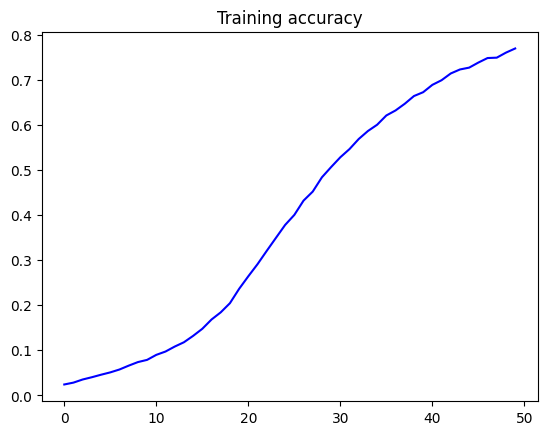

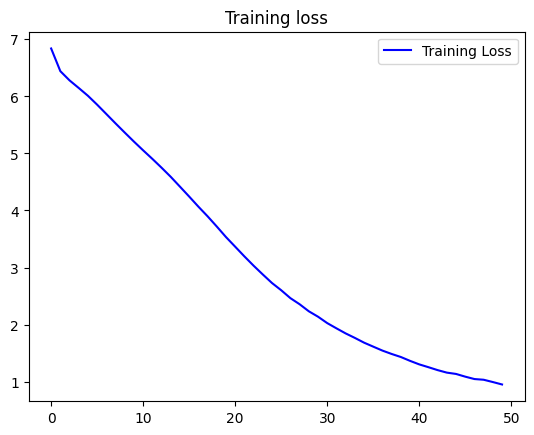

In [47]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

# **download**

In [48]:
def download_history():
  import pickle
  from google.colab import files

  with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

  files.download('history.pkl')

download_history()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **generating text**

In [49]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100

for _ in range(next_words):
    # Convert the text into sequences
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    # Pad the sequences
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    # Get the probabilities of predicting a word
    predicted = model.predict(token_list, verbose=0)
    # Choose the next word based on the maximum probability
    predicted = np.argmax(predicted, axis=-1).item()
    # Get the actual word from the word index
    output_word = tokenizer.index_word[predicted]
    # Append to the current text
    seed_text += " " + output_word

print(seed_text)

Help me Obi Wan Kenobi, you're my only hope of wrongs time's thief more bear bail both will will lose say so heart be fullness fullness ' art best more well deem bad more well deem bad young contains ' to it find room if accuse thee to it old wink not not thee bright more untrue great weeds ' told in thee doth lie not still thine for this will lie me thee it more be deem deem more aside slain deem deem deem seen ' so call contains fullness ' call mistaking me that best do ere thee dearer convertest free contains more deem seen seen '
